# Multiple Linear Regression Bike Sharing Assignment

# Problem Statement: 

US bike-sharing provider **BoomBikes** seeks to recover from pandemic-induced revenue drops with a strategic business plan. Anticipating post-lockdown demand, they aim to stand out and meet people's bike-sharing needs, ensuring success and significant profits.

**The company wants to know:**

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Business Goal:**

- Develop a robust model to identify the significant variables influencing the demand for shared bikes, leveraging the available independent variables effectively.
- This model empowers management to comprehend and adapt the business strategy, effectively meeting demand levels and exceeding customer expectations.

# Importing Required Libraries

In [178]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step1: Reading Dataset and Understanding Data

In [179]:
#Read the csv file:
day_df = pd.read_csv('day.csv')

**Verifying the head of the dataframe**

In [180]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
#Checking the shape:
day_df.shape

(730, 16)

In [182]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [183]:
#Checking the numerical data:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [184]:
#Checking the columns:
print(list(day_df.columns ), end='')

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [185]:
#Checking the size of data:
day_df.size

11680

In [186]:
#Checking the data types:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [187]:
#Checking the dimensions of data:
day_df.ndim

2

In [188]:
#Checking the values of data:
day_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

**The dataset contains 730 rows and 16 columns, and all columns are complete without any null values.**

# Step2: Cleaning Data

**2.1 Drop irrelevant columns to streamline the analysis and focus on essential variables.**

- "instant" serves as a row instance identifier and does not contribute to the predictive analysis.

- "dteday" is excluded since features like "mnth," "year," and "weekday" already capture relevant date information, and daily demand trends are not considered for this analysis.

- "casual" and "registered" are excluded from the prediction as they directly form the target variable "cnt" (target = casual + registered), leading to data leakage and rendering them unavailable during prediction.

In [189]:
#Before removing the date, let's introduce a new variable called "days_old" to indicate the age of the business:
day_df['days_old'] = (pd.to_datetime(day_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [190]:
#Verifying the above statement:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [191]:
#Dropping the "instant" column as it serves as the index and has no impact on the target variable:
day_df.drop(['instant'], axis = 1, inplace = True)

#Dropping "dteday" from the dataset as we already have "month" and "weekday" columns available for analysis:
day_df.drop(['dteday'], axis = 1, inplace = True)

#Dropping the 'casual' and 'registered' columns since we have the 'cnt' column, which represents the sum of both and serves as the target variable:

day_df.drop(['casual'], axis = 1, inplace = True)
day_df.drop(['registered'], axis = 1, inplace = True)

In [192]:
#Verifying the data frame after dropping:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [193]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [194]:
day_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [195]:
day_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [196]:
day_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


**It appears that some features such as season, month, weekday, and weather situation are currently represented as integers, even though they should be categorized as non-numerical variables.**

# **2.2 Handling Missing values**

Although we have observed no missing values, let's reconfirm this fact for assurance.

In [197]:
#Checking the null counts by column:
day_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

**Inference:** The dataset is complete; no null values are present.

# 2.3 Handling the Outliers

In [198]:
#Checking the columns:
print(list(day_df.columns ), end='')

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old']

In [199]:
#Print the count of unique values in each column:
day_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

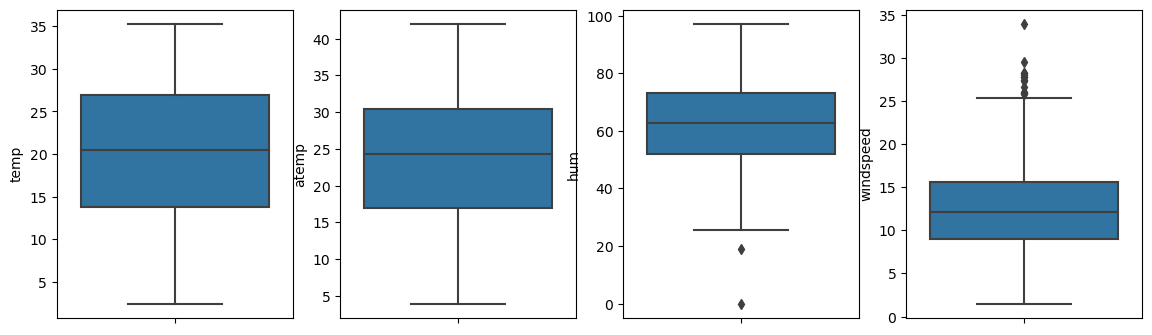

In [200]:
#Create box plots to visualize the distribution of independent variables with continuous values:
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(14,4))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y = col, data = day_df)
    i+=1

**Upon examining the plots, it is evident that there are no outliers present in the dataset. This absence of outliers assures us of the data's integrity and quality.**

# 3. EDA

## 3.1 Convert the variables "season" and "weathersit" into categorical types

In [201]:
day_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

day_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

day_df.mnth = day_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

day_df.weekday = day_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


# 3.2 Visualize the linear relationships between pairs of variables by drawing pair plots

<Figure size 1700x2800 with 0 Axes>

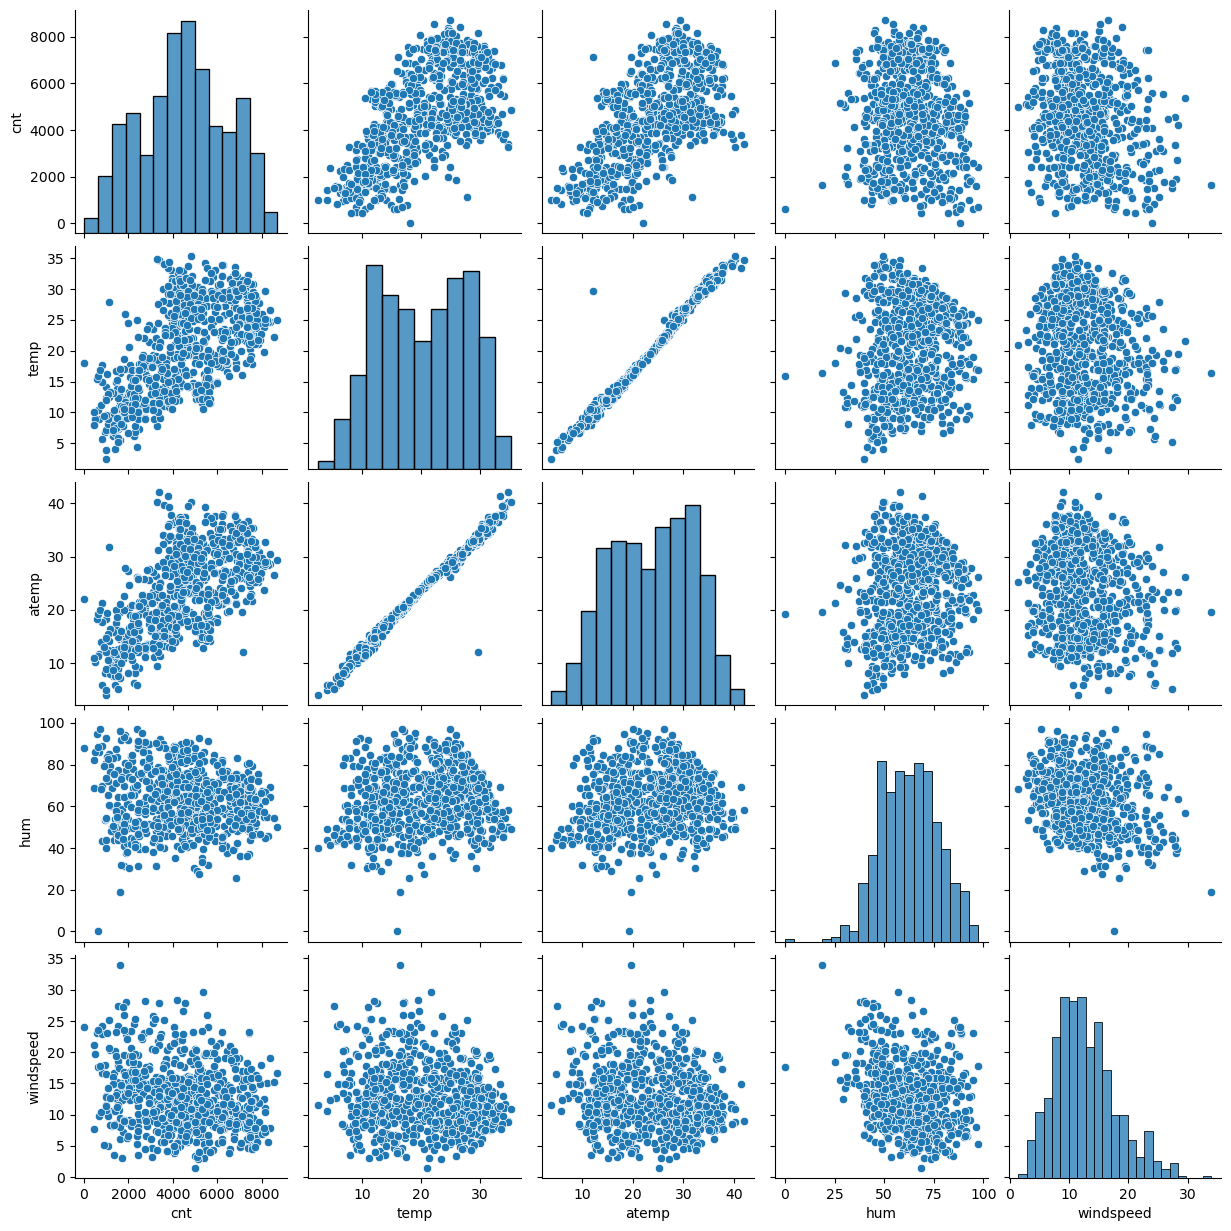

In [202]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (17,28))
sns.pairplot(data = day_df, vars = ['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**Inference:**
    
   - temp and atemp show the highest correlation with the target variable cnt.
   - Additionally, temp and atemp are highly correlated with each other.
   
**Correlation map shows linear relationship of output variable with temp and atemp.**  

# 3.3 Visualize data to discover correlations among numerical variables

<Figure size 2200x1600 with 0 Axes>

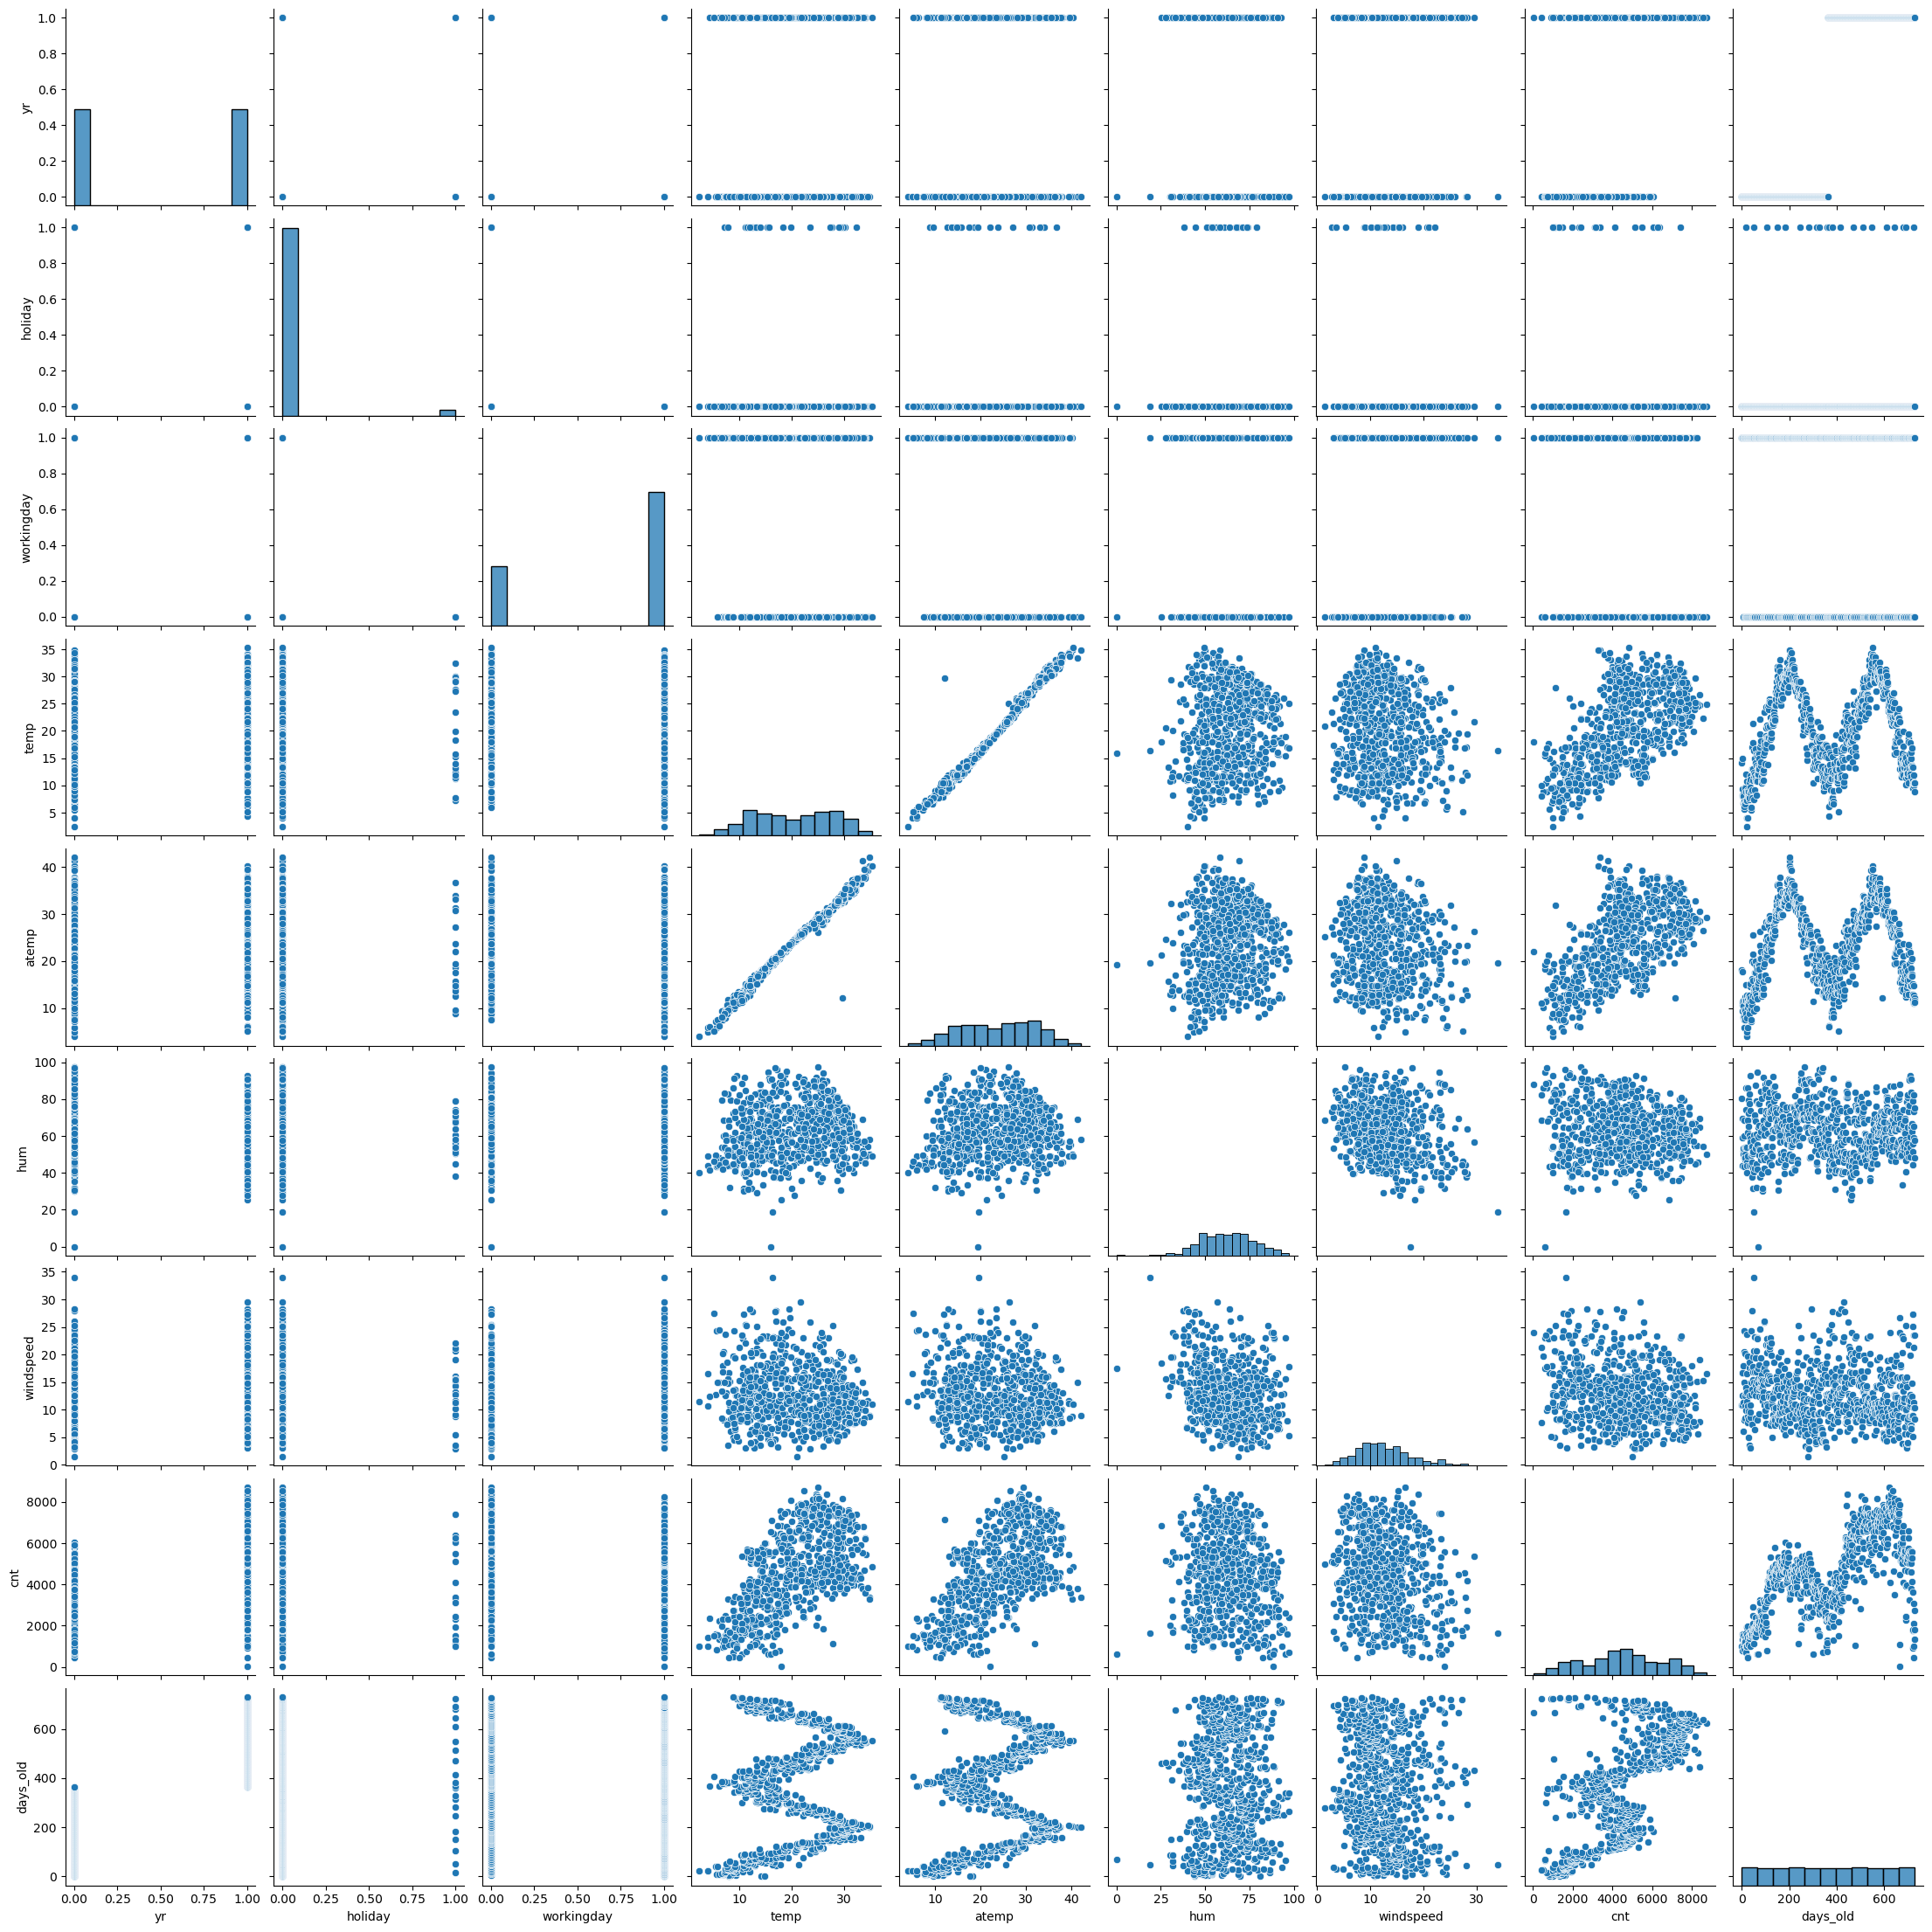

In [203]:
plt.figure(figsize = (22,16))
sns.pairplot(day_df)
plt.show()

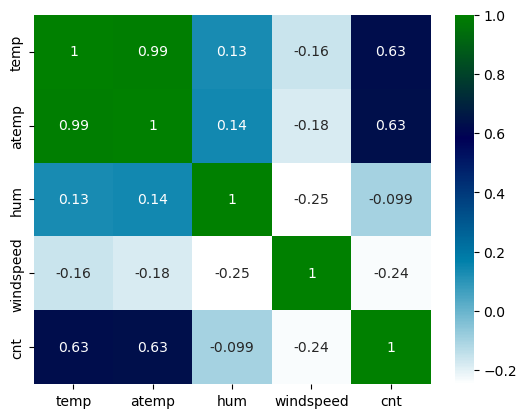

In [204]:
#Evaluating relationships between continuous variables:
sns.heatmap(day_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='ocean_r', annot = True)
plt.show()

Here, temp and atemp are highly correlated (correlation > 0.99, almost equal to 1), with atemp appearing to be derived from temp. Therefore, we can drop the atemp field.

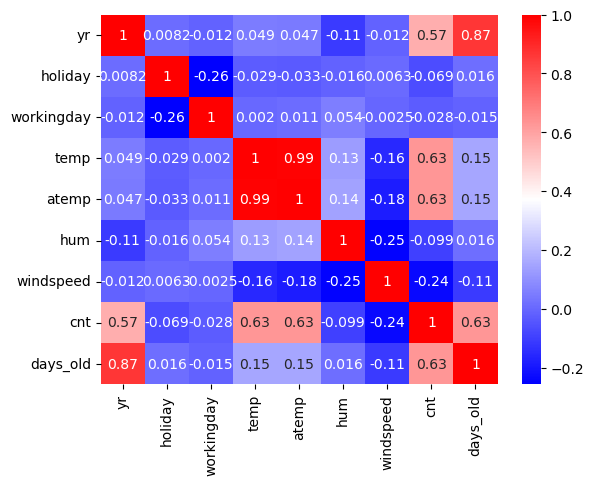

In [205]:
#Correlations for numeric variables
correaltion = day_df.corr()
sns.heatmap(correaltion, cmap="bwr", annot = True)
plt.show()

# 3.4 Create correlation heatmap

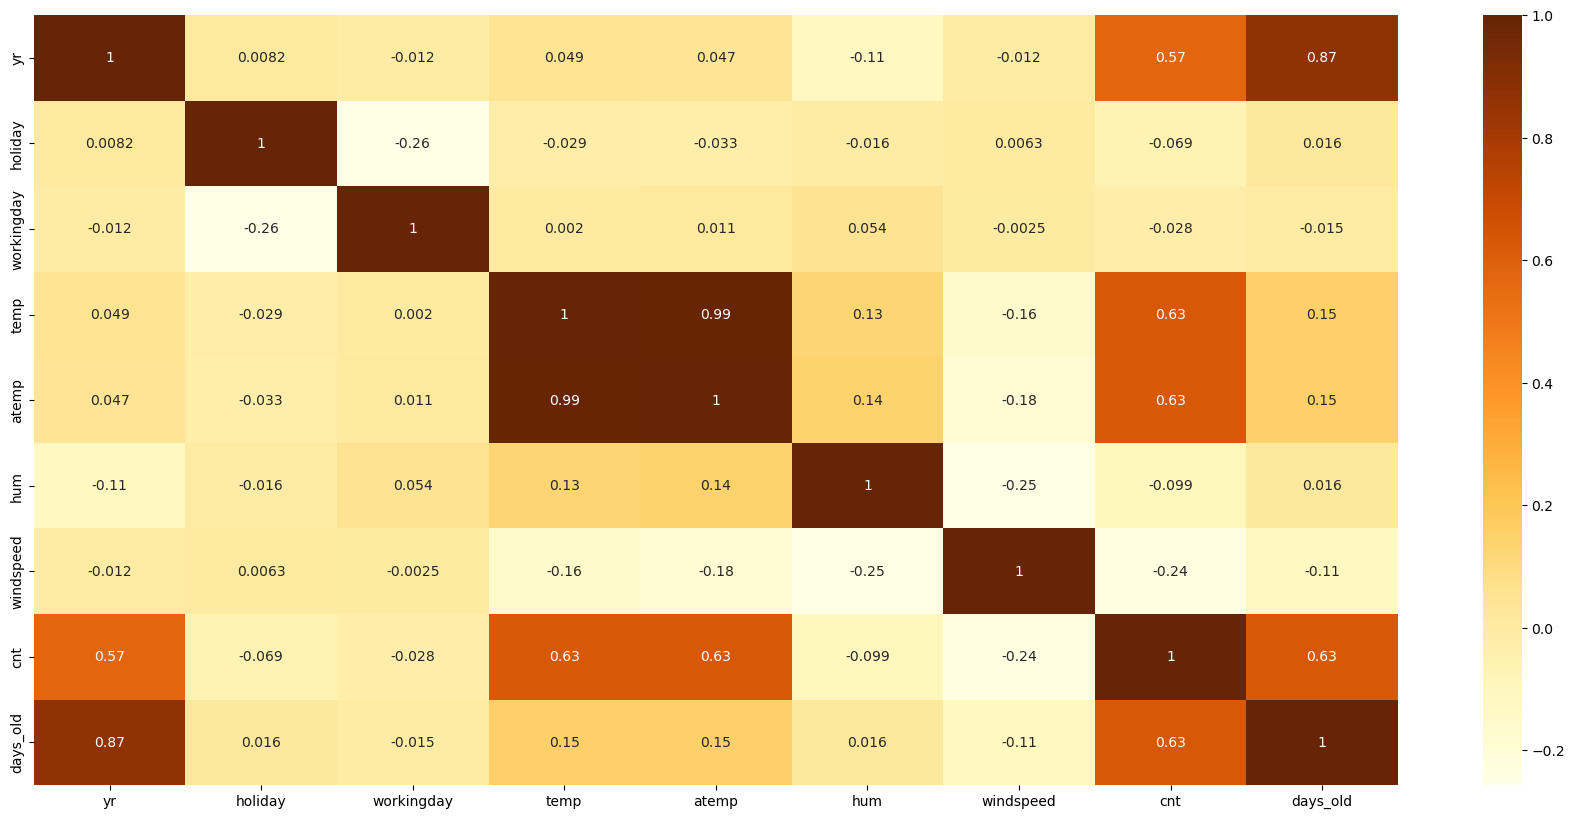

In [206]:
#Calculate Correlation:
correaltion = day_df.corr()
plt.figure(figsize=(22,10))

#Draw Heatmap of correlation:
sns.heatmap(correaltion, annot = True, cmap = 'YlOrBr')
plt.show()

In the correlation map, temp, atemp, and days_old show high correlation, suggesting they could be considered for the model. However, we will later eliminate them based on the Variance Inflation Factor during model building.

Additionally, the target variable exhibits a linear relationship with certain independent variables, indicating a favorable condition for constructing a linear regression mode

# 3.5 Analysing Categorical Variabels with target variables

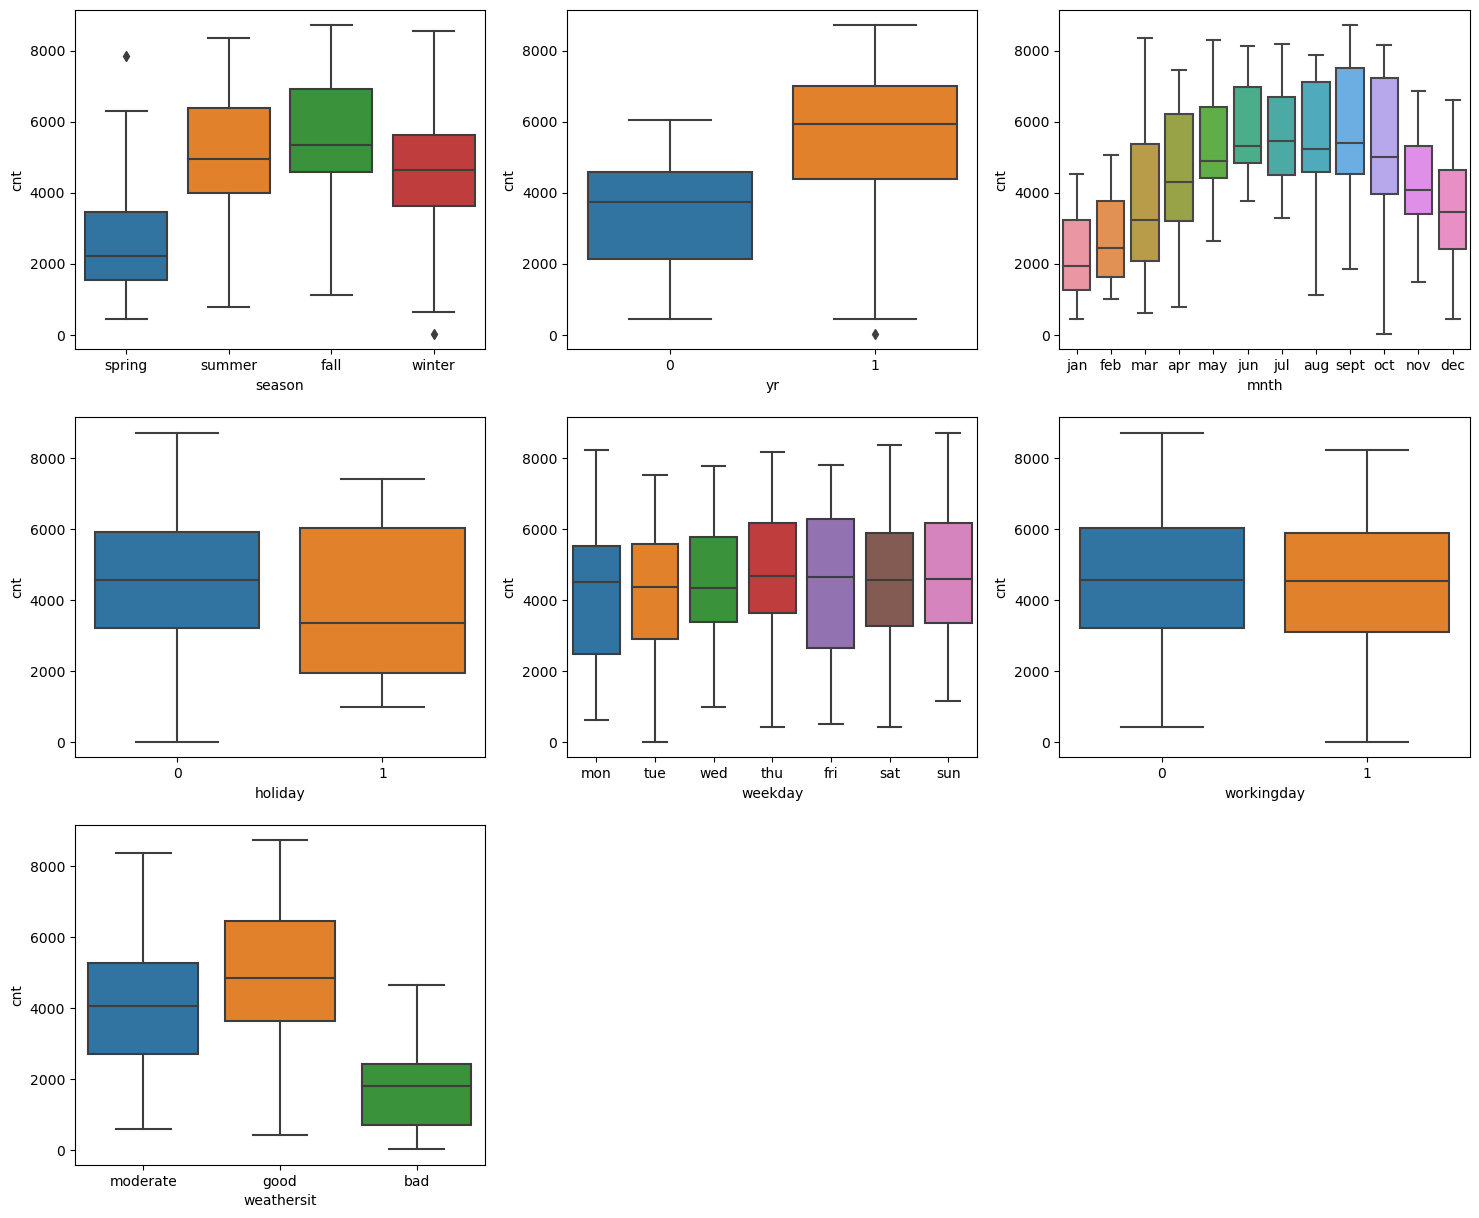

In [207]:
#Categorical boxplot for demand visualization:
vars_categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(18, 15))
for i in enumerate(vars_categorical):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=day_df, x=i[1], y='cnt')
plt.show()

**Inference:**

Numerous insights can be drawn from the plots:
    
1. The fall season experiences the highest demand for rental bikes.
2. The demand for the upcoming year has shown significant growth.
3. Demand exhibits a consistent monthly increase until June, with the peak occurring in September. However, after              September, demand starts to decline.
4. Holidays result in decreased demand for rental bikes.
5. Demand patterns on weekdays are not providing a clear picture.
6. Clear weather conditions correspond to the highest demand for rental bikes.
7. Bike sharing is more prevalent during September, while it tends to decrease towards the end and beginning of the            year.
    

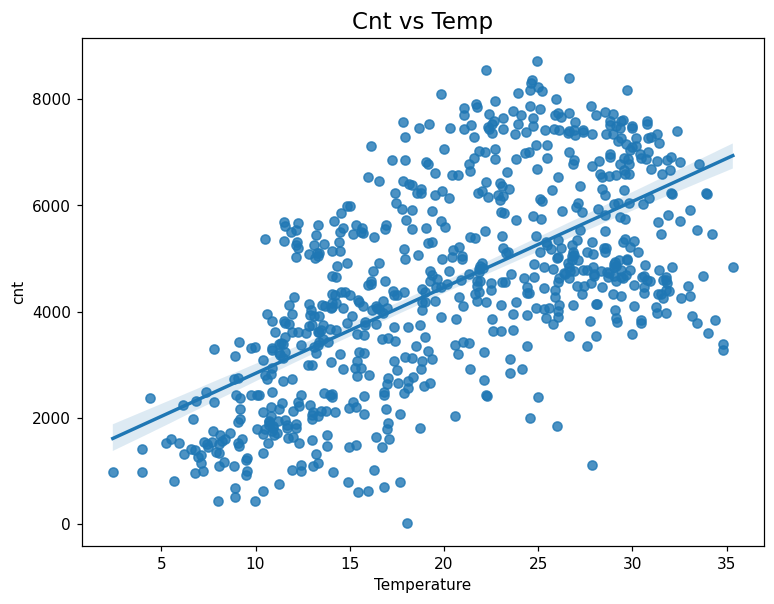

In [208]:
plt.figure(figsize = (8,6), dpi = 110)
plt.title("Cnt vs Temp", fontsize = 15)
sns.regplot(data = day_df, y = "cnt", x = "temp")
plt.xlabel("Temperature")
plt.show()

**Inference:**
    
1. Demand for bikes positively correlates with temperature.
2. Cnt shows a linear increase with rising temperatures, indicating a linear relationship.

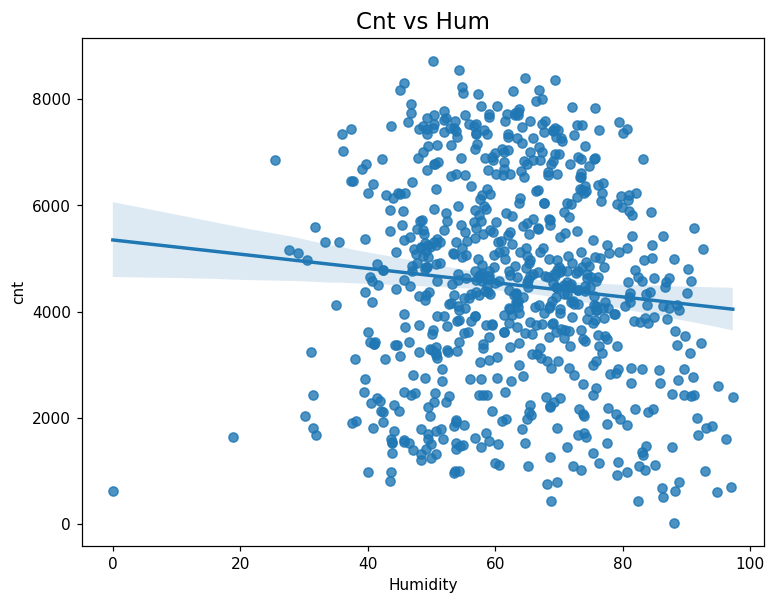

In [209]:
plt.figure(figsize = (8,6),dpi = 110)
plt.title("Cnt vs Hum",fontsize = 15)
sns.regplot(data = day_df,y = "cnt", x = "hum")
plt.xlabel("Humidity")
plt.show()

**Inference:**
    
1. Hum values are more scattered.
2. Cnt decreases with increasing humidity.    

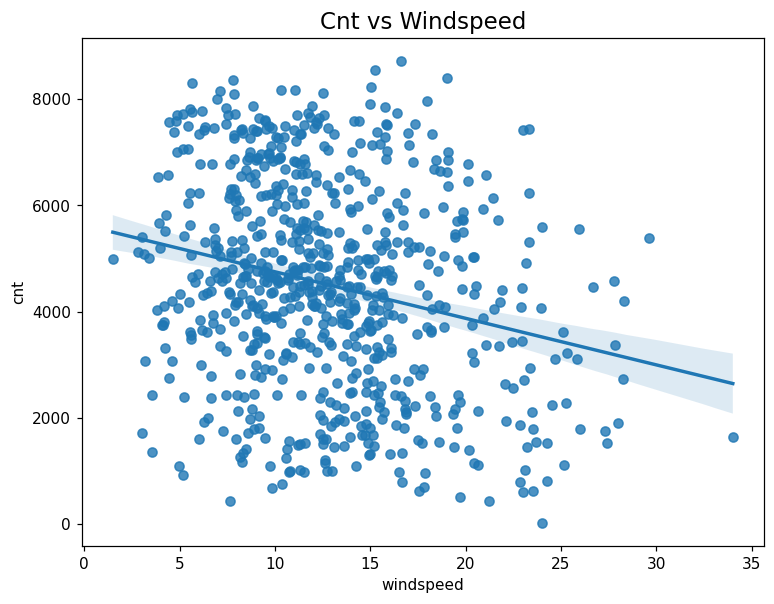

In [210]:
plt.figure(figsize=(8,6), dpi = 110)
plt.title("Cnt vs Windspeed", fontsize = 15)
sns.regplot(data = day_df, y = "cnt", x = "windspeed")
plt.show()

**Inference:**
    
1. Windspeed values are more scattered.
2. Cnt decreases as windspeed increases.

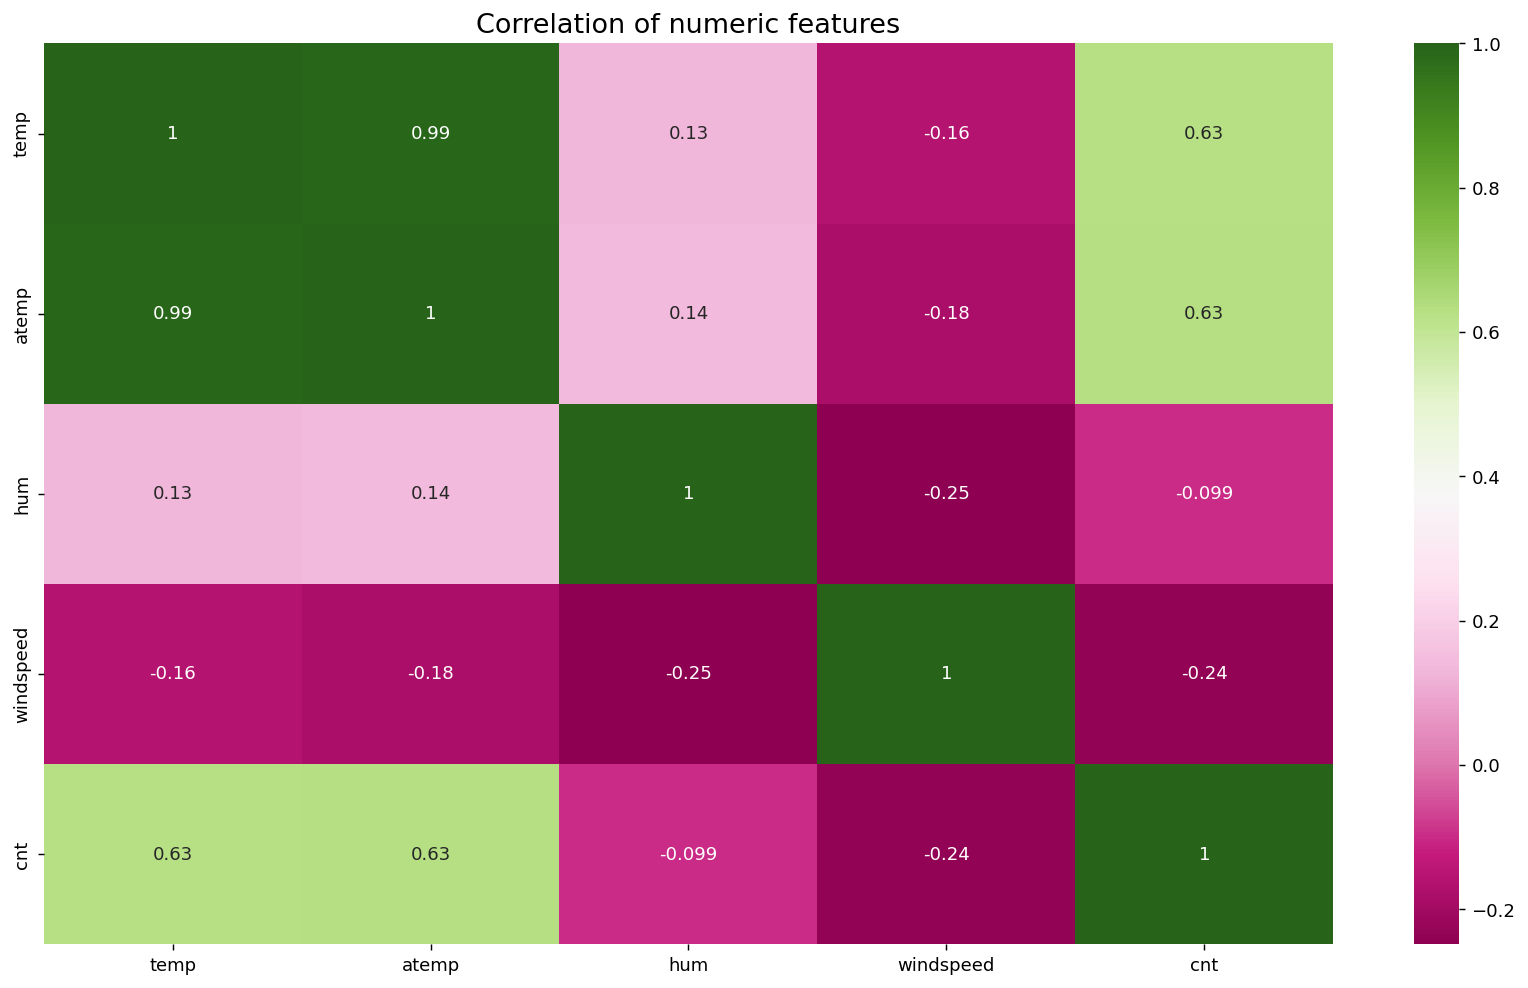

In [211]:
numeric_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize = (16,9), dpi = 130)
plt.title("Correlation of numeric features", fontsize = 15)
sns.heatmap(day_df[numeric_features].corr(), annot = True, cmap = "PiYG")
plt.show()

**Inference:**
    
1. temp and atemp are strongly correlated, but both will be retained for further analysis.
2. Both temp and atemp are highly correlated with the "cnt" variable.    

In [212]:
day_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# 4. Linear Regression Data Preparation

**4.1 Create dummy variables for all categorical variables**

In [213]:
day_df = pd.get_dummies(data = day_df, columns = ["season","mnth","weekday"], drop_first = True)
day_df = pd.get_dummies(data = day_df, columns = ["weathersit"])

- Dropping (p-1) columns as dummies explains p categories.
- Weathersit: First column not dropped to retain severe weather info.

In [214]:
#Print the columns after dummy variable creation:
day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [215]:
#Print a few rows for inspection:
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# 5. Model Building

## 5.1 Split Data into training and test

In [216]:
#Checking shape before splitting:
day_df.shape

(730, 32)

In [217]:
#X represents all remaining variables and serves as our independent variable:
X = day_df

#Train Test split with 70:30 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [218]:
#Inspect independent variables:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [219]:
#Checking shape and size for train and test:
print(X_train.shape)
print(X_test.shape)

(510, 32)
(220, 32)


# 5.2 Feature scaling for continuous variables

Scale continuous columns (temp, hum, windspeed) for better interpretation and visualization.

In [220]:
#Importing required libraries:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [221]:
#Scaling of continuous variables:
numeric_vars = ['temp','atemp','hum','windspeed','days_old']

#Using Normalized scaler to scale:
scaler = MinMaxScaler()

#Fit and transformung the training set:
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])

In [222]:
#Verifying the stats from training set after scaling:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,4485.337255,0.505055,0.243137,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,1950.666077,0.287907,0.429398,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.255838,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.510989,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.757898,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
#Checking the head:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0.791209,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0.585165,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1.000000,1,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0.662088,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1683,0.152473,0,...,0,0,0,1,0,0,0,0,0,1


# 5.3 Create Model with RFE and Automation

#### Apply RFE for column elimination

In [224]:
#Create an instance of the regression model:
lm = LinearRegression()

#Fit the data:
lm.fit(X_train, y_train)

#Run RFE on the model with 15 features:
rfe = RFE(lm, n_features_to_select = 15)

#Fit the training data and get the selected features:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [225]:
#RFE-selected columns and their weights:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 13),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 8),
 ('windspeed', True, 1),
 ('cnt', True, 1),
 ('days_old', True, 1),
 ('season_spring', False, 4),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 17),
 ('mnth_mar', False, 7),
 ('mnth_may', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', False, 12),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 5),
 ('weekday_tue', False, 18),
 ('weekday_wed', False, 10),
 ('weathersit_bad', True, 1),
 ('weathersit_good', False, 15),
 ('weathersit_moderate', False, 2)]

# 5.4 Manual Elimination

### Create a function that builds a model using the statsmodels API

In [226]:
#Create a model using the Statsmodels API that accepts a parameter specifying the columns to be selected for the model:
def build_model(column):
    X_train_sm = sm.add_constant(X_train[column])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

### Create a function that calculates and prints the VIFs

In [227]:
#Function to calculate and print VIFs for given columns:
def get_vif(column):
    df1 = X_train[column]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [228]:
#Print the columns selected by RFE for manual elimination:
X_train.columns[rfe.support_]

Index(['workingday', 'temp', 'atemp', 'windspeed', 'cnt', 'days_old',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weathersit_bad'],
      dtype='object')

In [229]:
#Excluded features by RFE:
X_train.columns[~rfe.support_]

Index(['yr', 'holiday', 'hum', 'season_spring', 'season_summer', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [230]:
#Using the 15 columns selected by RFE for regression:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [231]:
#Checking the shape:
X_train_rfe.shape

(510, 15)

# 6. Build Model

## 6.1 Model 1: Initialization with all RFE-selected variables

In [232]:
column = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          1.67e-188
Time:                        20:29:06   Log-Likelihood:                -4112.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2730.3983    

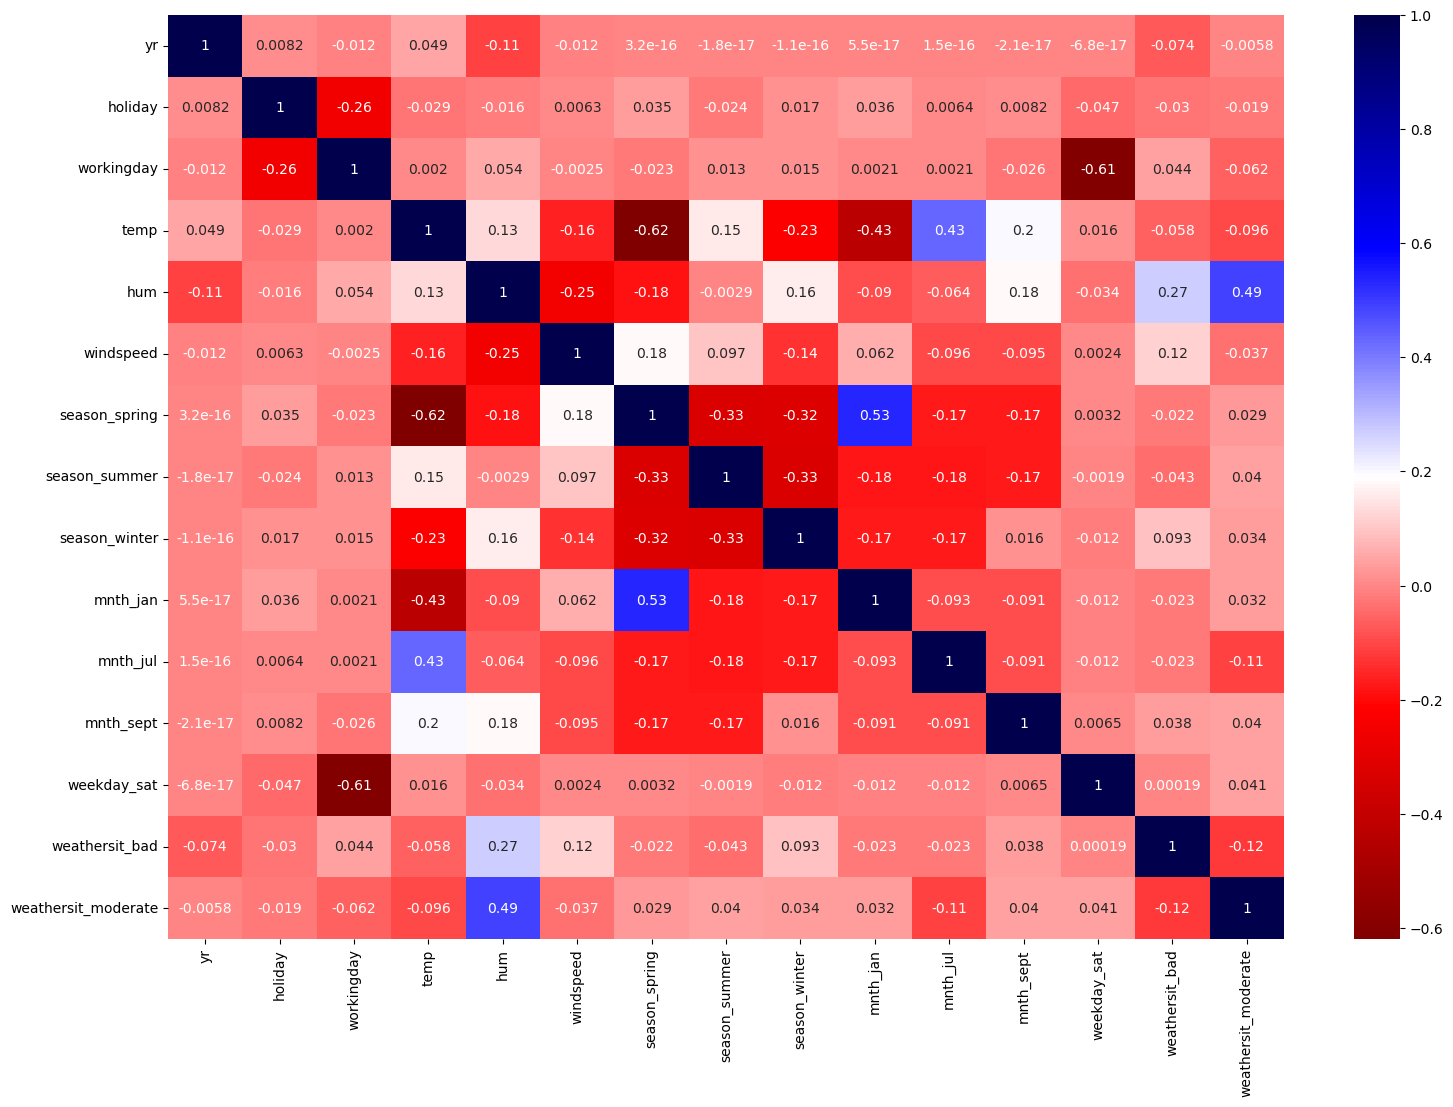

In [233]:
#Assessing the correlation between RFE-selected features and the target column to understand their impact on the target variable:
plt.figure(figsize = (18,12))
sns.heatmap(day_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='seismic_r', annot=True)
plt.show()

# Model 2

In [234]:
#Drop the variable "weekday_sat" due to its negative coefficient and high p-value:
column = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          1.31e-189
Time:                        20:29:19   Log-Likelihood:                -4112.4
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     495   BIC:                             8318.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2701.5145    

# Model 3

In [235]:
#Drop the variable "hum" due to its negative coefficient and high p-value, indicating insignificance:
column = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          7.87e-187
Time:                        20:29:25   Log-Likelihood:                -4121.8
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     496   BIC:                             8331.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2039.9171    

# Model 4

In [236]:
#Drop the variable "windspeed" due to its negative coefficient and high p-value, indicating insignificance:
column = ['yr', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          4.58e-180
Time:                        20:29:30   Log-Likelihood:                -4140.7
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     497   BIC:                             8362.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1545.6135    

# Model 5

In [237]:
#Drop the variable "mnth_jul" due to its negative coefficient and high p-value, indicating insignificance:
column = ['yr', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.5
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          1.13e-179
Time:                        20:29:35   Log-Likelihood:                -4144.4
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1475.2757    

# Model 6

In [238]:
#Drop the variable "temp" due to its negative coefficient and high p-value, indicating insignificance:
column = ['yr', 'holiday', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.5
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          8.01e-147
Time:                        20:29:39   Log-Likelihood:                -4224.8
No. Observations:                 510   AIC:                             8472.
Df Residuals:                     499   BIC:                             8518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4792.5170    

**Model 6 is chosen as the final model due to its excellent statistics: high R-squared, Adjusted R-squared, and F-statistic. Additionally, it contains no insignificant variables or multicollinear features (high VIF). The difference between R-squared and Adjusted R-squared is negligible, indicating that no additional parameters can be removed from the model. Overall, the VIF values seem acceptable, and the p-values for all features are nearly 0.0.**

In [239]:
#Build a model with all columns for automatic feature selection:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [240]:
#Build the final model using sklearn:
column = ['yr', 'holiday', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Build a model using the above specified columns:
lr = build_model_sk(X_train[column], y_train)
print(lr.intercept_, lr.coef_)

4792.516963552067 [ 2144.44702271 -1034.80062015  -200.11043287 -2450.89393885
  -468.19887567  -669.47720433  -757.67216674   697.89704594
 -2759.6377089   -749.12992245]


# 7. Model Evaluation

## 7.1 Residual Analysis

In [241]:
y_train_pred = lr.predict(X_train[column])

In [242]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

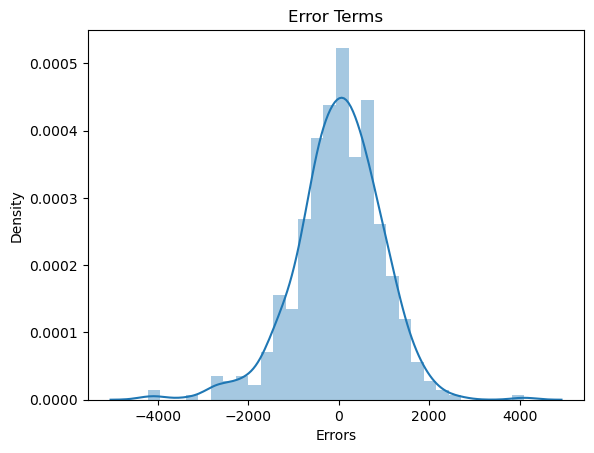

In [243]:
plot_res_dist(y_train, y_train_pred)

**Errors exhibit a normal distribution with a mean of 0, indicating everything is satisfactory.**

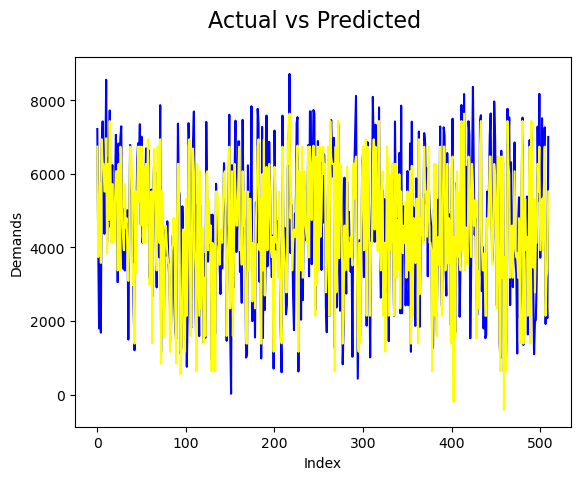

In [244]:
#Actual vs Predicted:
checker = [i for i in range(0,len(X_train), 1)]
plt.plot(checker, y_train, color = "blue")
plt.plot(checker, y_train_pred, color= "yellow")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**Actual and Predicted results exhibit a similar pattern, indicating that the model is satisfactory.**

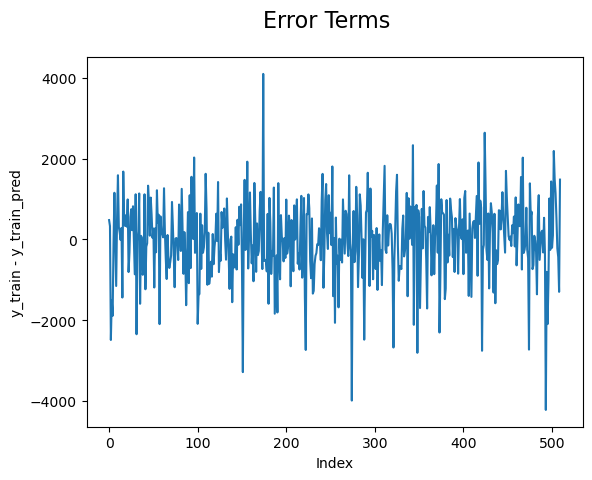

In [245]:
#Error Terms:
checker = [i for i in range(0,len(X_train), 1)]
plt.plot(checker, y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('y_train - y_train_pred')
plt.show()

**Here, the error terms are independent.**

In [246]:
#Print R-squared Value:
r2_score(y_train, y_train_pred)

0.7582345056029738

**Inference: The R2 remains unchanged, matching our final model's value.**

## 7.2 Linearity Check

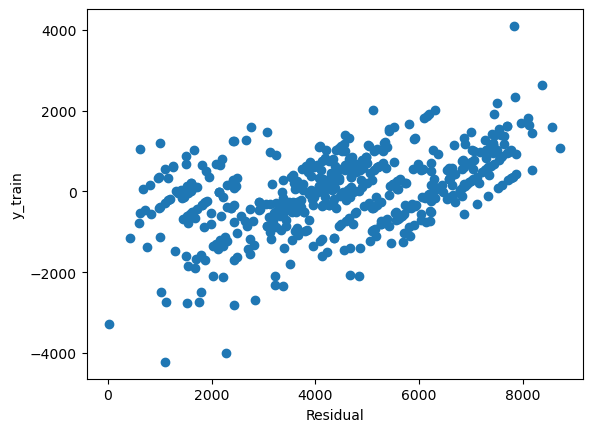

In [247]:
#Check scatter plot:
residual = (y_train - y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## 7.3 Predictions for the test dataset

In [248]:
# Initialize a new MinMaxScaler with the appropriate feature range (0 to 1)
scaler = MinMaxScaler()

# Fit the scaler on the numeric variables in X_train
scaler.fit(X_train[numeric_vars])

# Apply data transformation on the test set using the fitted scaler:
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

In [249]:
#Columns from our final model
column = ['yr', 'holiday', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[column])

## 7.4 Predictions for testing R-squared value

In [250]:
#Calculate the R-squared value between the test and predicted test datasets: 
r2_score(y_test, y_test_pred)

0.7466363396526683

**The R2 value for predictions on the test data (0.746) closely matches the R2 value of the train data (0.758), indicating a strong performance of the model on both datasets. This high R-squared value suggests that the model generalizes well to unseen data, affirming its effectiveness.**

## 7.5 Homoscedasticity

Text(0, 0.5, 'y_test_pred')

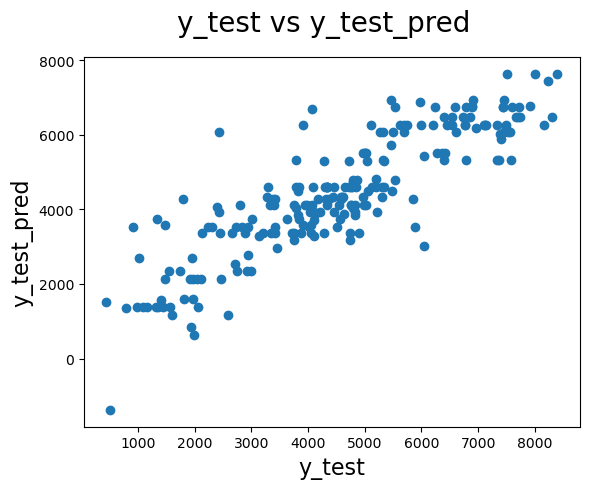

In [251]:
#Visualizing the spread by plotting y_test and y_test_pred:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

**Inference:** Residuals' variance remains constant across predictions, indicating minimal variation in error terms with changes in predictor variables.

## 7.6 Plot "Test vs Predicted" values

In [252]:
#Function to plot Actual vs Predicted:
#Input: Actual and Predicted values, Scale, and Title for Data Comparison:
def plot_act_pred(act,pred,scale,dataname):
    checker = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(checker, act, color = "blue", linewidth = 2.5, linestyle = "-")
    plt.plot(checker, pred, color="red", linewidth = 2.5, linestyle = "-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize = 20)            # Plot heading 
    plt.xlabel('Index', fontsize=18)                                           # X-label
    plt.ylabel('Counts', fontsize=16)                                          # Y-label

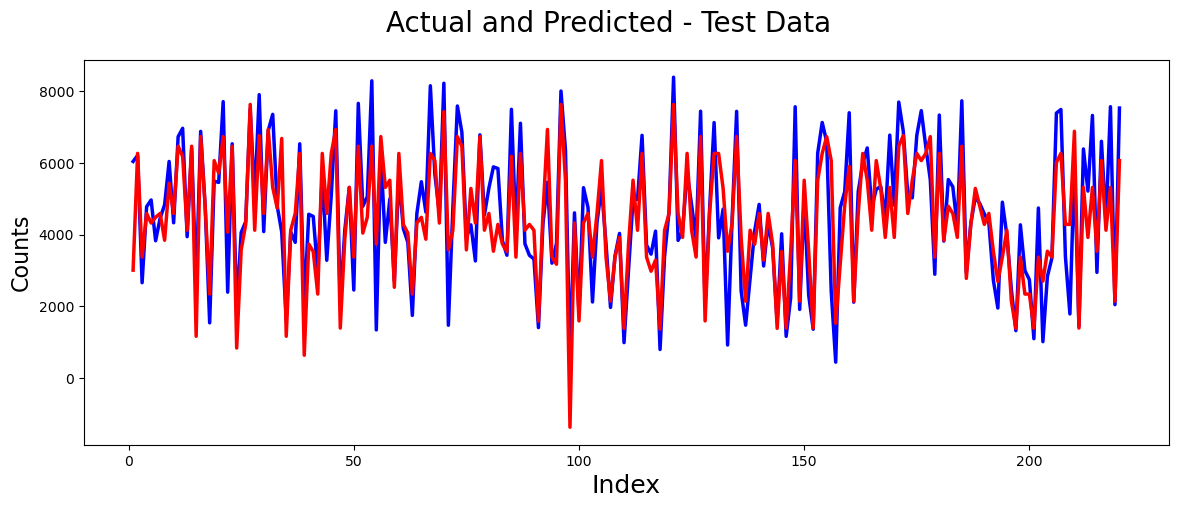

In [253]:
#Plot Actual vs Predicted for Test Data:
plot_act_pred(y_test, y_test_pred, len(y_test) + 1,'Test Data')

**Inference:** Test data predictions closely match actuals.

## 7.7 Plot Test Data Error Terms

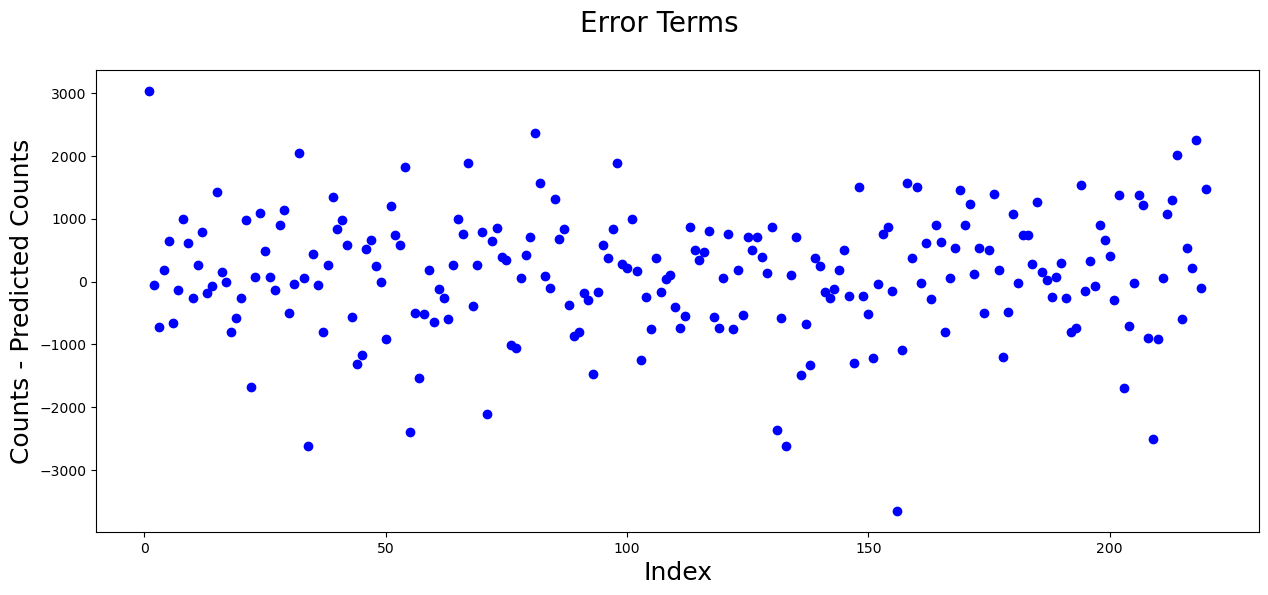

In [254]:
#Error Terms:
def plot_err_terms(act, pred):
    checker = [i for i in range(1, len(act) + 1)]
    fig = plt.figure(figsize=(15, 6))
    plt.plot(checker, act - pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)  # Plot heading
    plt.xlabel('Index', fontsize=18)  # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=18)

#Plot error terms for test data:
plot_err_terms(y_test, y_test_pred)

**Inference:** The randomly distributed error terms indicate that the model's output is well explained by the predictions, and no other parameters are better suited to explain the model.

# 8. Making Predictions

In [255]:
#Performing data validation prior to scaling:
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


## 8.1 Interpreting the Model

### Interpret the RFE with Manual model results, prioritizing imputation importance

In [256]:
#Rebuild the final model using the manual + RFE approach with Statsmodels for interpretation:
column = ['yr', 'holiday', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

lm = build_model(column)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.5
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          8.01e-147
Time:                        20:30:42   Log-Likelihood:                -4224.8
No. Observations:                 510   AIC:                             8472.
Df Residuals:                     499   BIC:                             8518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4792.5170    

### Based on the analysis of the above model, the company should prioritize the following features:

- The company is recommended to prioritize business expansion during the spring season.
- Focusing on business expansion in September is advisable as it is expected to have a significant positive effect on bike rentals.
- During weather conditions characterized by Light Snow or Rain, bike bookings are likely to decrease. The company can utilize this time to perform bike servicing without significant business impact.

**During normal situations, the company should launch new offers in the pleasant spring season and promote business for September, which is expected to be the peak period.**